<div align="center">
    
## 쏘카 메모(memo)에서 중요한 키워드 찾기
</div>

### 5-1. 들어가며

**쏘카에서 해결하고자 하는 것**

---
사용자가 쏘카 서비스를 이용해 운행을 하다가(혹은 차량 상태 확인 후) 차량이 고장나거나 소머품의 교체가 필요하다고 생각한 경우 절차를 밟는 과정.

사용자는 쏘카의 고객 상담 센터로 고장을 알리고, 상담 센터에서는 수리를 받아야 하는 차량의 수리 요청을 보낸다. 그러면 고장이 난 차량을 인근 협업 공업사로 보내고 수리를 맡긴다. 수리를 마친 공업사는 장비 및 수리를 진행한 부분을 메모(기록)로 남기게 된다.

이때, 각기 다른 공업사에서 작성하는 용어에서 차이가 발생하게 된다. 예를 들어, 차량의 배기구를 `머플러`라고 부른는 것이 정식 명칭이지만, A공업사에서 `마후라`라고 지칭하고, B공업사에서는 `머플러`라고 지칭하는 경우가 생긴다. 이런 경우 공업사 A, B의 수리 일지를 보고 동일한 부품을 수리하였는지 어떻게 판단해야 할까? 또 어떻게 두 단어를 하나의 카테고리로 분류해야 할까?

두 가지의 수리 결과를 하나의 카테고리로 보지 못하게 된다면 월말 카테고리별 수리 금액을 정산하는 과정에서 예정된 금액과의 차이가 발생한다. 이 차이를 찾기 위해 카테고리에서 누락된 부분을 인력으로 찾아야 하는 문제가 발생하게 된다. 이 과정을 줄이기 위해 쏘카에서는 메모를 보고 카테고리를 찾아내는 부분을 자동화 하고자 한다.



**학습 목표**

---
- 자연어 처리를 알고 토큰화를 이해한다.
- 토크나이저를 사용하여 토큰화를 할 수 있다.
- 토큰화를 마친 결과를 다양한 방법으로 시각화 할 수 있다.


**학습 목차**

---
1. 자연어처리
2. 데이터준비
3. 데이터 전처리
4. 단어 빈도 카운팅
5. word cloud

**준비물**

---

In [1]:
!mkdir -p ~/aiffel/socar_memo/data
!ln -s ~/data/* ~/aiffel/socar_memo/data

ln: failed to create symbolic link '/aiffel/aiffel/socar_memo/data/carDic.txt': File exists
ln: failed to create symbolic link '/aiffel/aiffel/socar_memo/data/KCC150_100k.txt': File exists
ln: failed to create symbolic link '/aiffel/aiffel/socar_memo/data/korean_stopword.txt': File exists


### 5-2. 자연어처리

**자연어와 자연어처리에 대한 정의**

---
자연어란 사람들이 일상적으로 사용하는 언어를 일컫는 말로, 인공어와 대비되는 개념이다. 자연어처리는 인간의 언어 현상을 컴퓨터와 같은 기계를 이용해서 묘사할 수 있도록 연구하거나 구현하는 분야이다. 자연어처리는 사람들의 언어를 연구 대상으로 삼기 때문에, 언어학과 언어 인지 과학과 연관이 깊다.

기존에는 규칙 기반 방법과 통계 기반 방법이 주로 좋은 성능을 이끌어 냈지만 딥러닝의 등장으로 분위기가 바뀌며 더 활발한 연구 분야로 자리 잡았다. 최근에는 정보 검색, QA 시스템, 문서 분류, 클러스터링, 챗봇 등 다양한 응용이 이루어지고 있다.

- [자연어처리](https://ko.wikipedia.org/wiki/%EC%9E%90%EC%97%B0%EC%96%B4_%EC%B2%98%EB%A6%AC)
- [자연어처리 무엇인가](http://www.aitimes.kr/news/articleView.html?idxno=15036)

**한국어 구성 요소**

---
한국어는 아래와 같은 요소들로 구성되어 있다.
- **음운**: 말의 뜻을 구별해주는 소리의 최소 단위(ㄱ,ㄴ,ㄷ,...,ㅏ,ㅑ,ㅓ,...)
- **음절**: 독립하여 발음할 수 있는 최소 소리 단위(가,나,다,...,헿 & 모음은 따로 독립가능)
- **형태소**: 뜻을 가진 가장 작은 말의 단위(단, 자립할 수 있는 어휘형태소만 해당)<명사, 형용사,...>
- **단어**: 자립적으로 쓸 수 있는 말, 조사는 예외(사과, 기린, 토끼)
- **어절**: 문장을 구성하고 있는 각각의 마디로, 대개 띄어쓰기 단위와 일치
- **구**: 둘 이상의 단어가 모여 절이나 문장의 일부분을 이루는 문법의 단위(명사구, 동사구, 형용사구, ...)
- **절**: 주어-서술어 관계를 가지고 있으나 독립적으로 사용 불가(명사절, 형용사절, 부사절)
- **문장**: 주어와 서술어를 가지고 있는 완결된 최소의 언어 형식




한국어 구성 요소는 [여기](https://m.blog.naver.com/PostView.naver?isHttpsRedirect=true&blogId=seconer&logNo=220766598859)서 참고.

**한국어 문장 성분**

---
한국어 문장이 주어졌을 때 각 요소를 문법적인 역할에 따라 구분해 볼 수도 있다. 이렇게 구분하는 경우는 총 일곱 가지 성분으로 나눌 수 있다. 각각 주어, 서술어, 보어, 목적어, 부사어, 관형어, 독립어라고 부른다.

이렇게 구성된 성분을 다시 세 가지 큰 그룹으로 묶으면, 주성분, 부속성분, 독립성분으로 나눌 수 있다.

주성분은 문장에 없으면 안되는 중요한 성분이라고 볼 수 있고, 부속성분은 문장에서 없어도 되지만 주성분을 수식하는 성분, 독립성분은 다른 요소와 문법적인 관계 없이 독립적으로 역할을 가지는 성분이다.

- [한국어의 문장 성분](https://ko.wikipedia.org/wiki/%ED%95%9C%EA%B5%AD%EC%96%B4%EC%9D%98_%EB%AC%B8%EC%9E%A5_%EC%84%B1%EB%B6%84)
- [한국어의 문장성분: ratsgo](https://ratsgo.github.io/korean%20linguistics/2017/10/01/sentcomp/)

- 한국어 문장 성분을 주성분, 부속성분, 독립성분으로 나눌 때, 문장의 의미를 최대한 유지하면서 지우려면 **독립성분 -> 부속성분 -> 주성분** 순으로 지우면 된다.

**자연어처리로 해결할 수 있는 것들**

---
**카테고리 분류**

카테고리 분류 문제는 다시 이진 분류 문제와 다중 분류 문제로 나눌 수 있다. 이진 분류는 0(거짓) 또는 1(참), 두 가지로 분류되는 문제를 의미하고, 다중 분류는 세 가지 이상으로 나눠지는 분류를 의미한다. 이러한 방법을 이용해서 문장이 표현하는 감성(카테고리)에 대해 분류하는 기술을 감성(카테고리) 분류라고 한다.

실생활에서 흔하게 접근 가능한 카테고리 분류에는 스팸 이메일 분류기가 있다. 이메일 주소로 여러 이메일이 도착했을 때, 자동으로 스팸 메일을 분류해 주는 기능을 자연어처리 기술을 활용하여 구현할 수 있다. 이메일에 불특정 다수의 특수 문자나 특정 단어가 출현하게 되면 스팸으로 분류하는 기술을 사용하여 분류할 수도 있다.

- [텍스트 분류와 감성 분석 구현하기](https://techblog-history-younghunjo1.tistory.com/111)

다른 예로는 위에서 언급했던 감성 분류(감성 분석이라고도 한다.)가 있다. 문장에 표현된 감정을 이진 혹은 다중으로 분류하는 작업을 통해 긍정/부정 또는 긍정/부정/중립 등으로 나눌 수 있다. 분류 기준을 꼭 이렇게 긍정/부정으로만 나누지 않고 다양하게 활용할 수도 있다. 한국어에서 대표적으로 사용되는 감성 분석 데이터셋은 [네이버 영화평 리부셋](https://github.com/e9t/nsmc)이 있다.

ex) 네이버 영화평을 감성 분석 한다면 아래처럼 나온다.
- 아 더빙.. 진짜 짜증나네요 목소리 - 😡부정
- 액션이 없는데도 재미 있는 몇안되는 영화 - 😍긍정
- ㅋㅋㅋㅋㅋㅋㅋ - 🤔뭐지?

하지만 ㅋㅋㅋㅋㅋㅋㅋ는 긍정, 또는 부정 둘 중 어느 감성에 맞는지 확신할 수 없다.
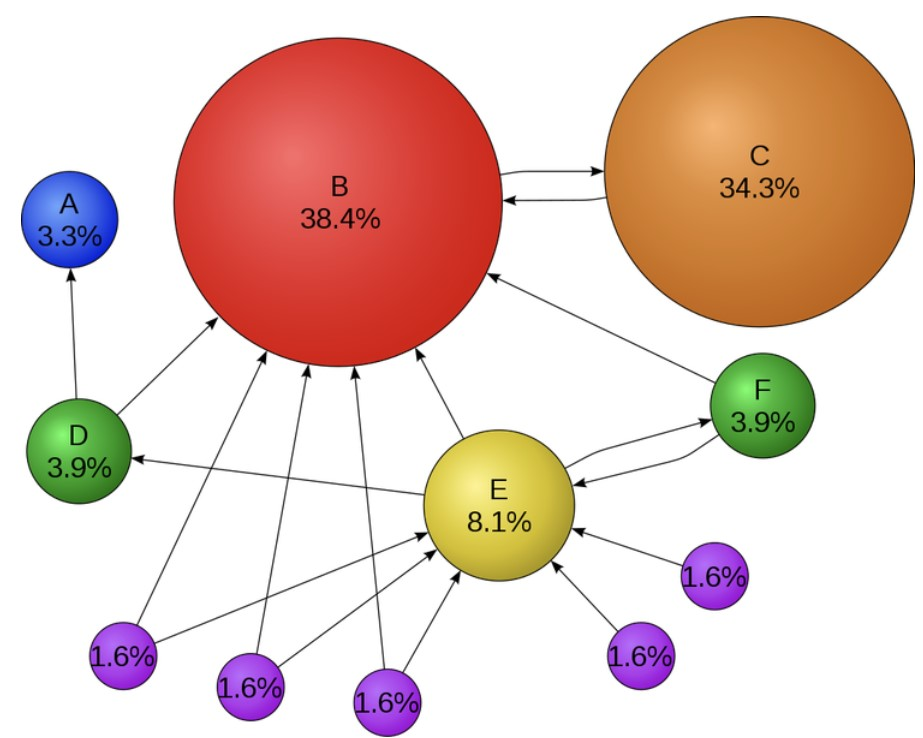<https://en.wikipedia.org/wiki/PageRank>


**키워드 추출**

긴 문서에서 빠르게 중요한 정보를 습득하기 위해 키워드나 중요한 문장을 추출하여 읽는다면 효율적이다. 문서의 단락을 요약하여 표현할 수도 있고, 문장에서 중요한 키워들를 추출하는 방법도 있다. 키워드 추출에 사용되는 고전적인 방법으로는 TextRank 알고리즘이나 TF-IDF방법이 있다.

TextRank라, word graph나 sentence graph를 구축한 뒤, graph ranking 알고리즘인 PageRank를 이용하여 각각 키워드와 핵심 문장을 선택하는 방법이다. 이 방법을 적용하여 사용하는 방법과 그에 대한 자세한 설명은 아래 블로그를 참고하면 된다.

- [TextRank를 이용한 키워드 추출과 핵심 문장 추출](https://lovit.github.io/nlp/2019/04/30/textrank/)

TF-IDF는 TF(Term-Frequency) + IDF(Inverse Document Frequency)라고 생각할 수 있다. TF와 IDF를 종합적으로 사용하는 방법이다.

TF는 Term Frequency인데, 특정 단어가 한 문서내에얼마나 자주 등장하는지를 나타내는 값이다. IDF는 Inverse Document Frequency인데, 특정 단어가 얼마나 적은(Inverse이므로) 문서에서 등장하는지를 나타내는 값이다. 이 둘을 함께 고려한다는 것은 한 문서에서는 자주 등장하지만 다른 문서에는 잘 나타나지 않는 단어가 문서의 주요 단어일 것이라는 뜻이다.

- [TF-IDF](https://wikidocs.net/31698)

### 5-3. 데이터 준비

**자동차 용어 사전**

---
자연어처리 분야에서 각 도메인마다 사용하는 단어는 다르다. 포털 사이트의 뉴스 섹션에 들어가 보면, 다양한 뉴스 카테고리가 있다. 뉴스 카테고리에서 사용되는 단어의 종류 역시 각 카테고리마다 다른 것을 확인할 수 있다. 경제 카테고리에서는 경제에 관련된 용어가 많이 출현할 것이고, 정치 카테고리에서는 정치, 법 등과 관련된 용어가 많이 출현하게 된다. 이렇게 각 도메인마다 사용하는 단어의 차이로 인해, 앞서 언급한 문제에 대한 해결이 명확하지 않다.

이를 해결하기 위한 한 가지 방법으로 자동차 용어 사전을 사용할 수 있다. 다만 이렇게 도메인에 특화덴 데이터(혹은 사전)은 구하기가 어렵고, 수작업으로 특정 도메인에 대한 사전을 구축하였다 해도 이 데이터가 타당한지 신뢰하기 어렵다는 한계가 있다.

우리는 요기서 코트라(kotra)에서 제공하는 자동차 부품 용어집을 사용하겠다.

- [자동차 부품 용어집](http://www.storrskoreanchurch.org/wp-content/uploads/2012/02/%EC%9E%90%EB%8F%99%EC%B0%A8-%EB%B6%80%ED%92%88-%EC%9A%A9%EC%96%B4%EC%A7%91.pdf)

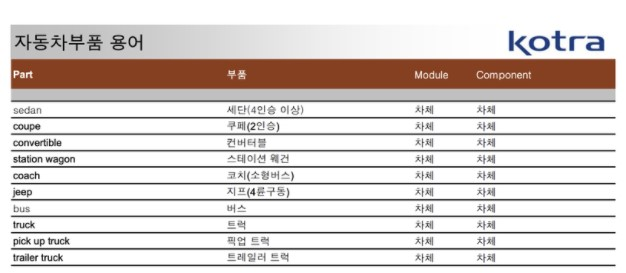
<http://www.storrskoreanchurch.org/wp-content/uploads/2012/02/%EC%9E%90%EB%8F%99%EC%B0%A8-%EB%B6%80%ED%92%88-%EC%9A%A9%EC%96%B4%EC%A7%91.pdf>

위 링크의 데이터 중 필요한 것만 추려 따로 저장해 둔 파일을 로드하겠다.

In [2]:
# 파일에 어떤 내용이 있는지 확인
!head ~/aiffel/socar_memo/data/carDic.txt

세단
쿠페
컨버터블
스테이션
코치
지프
버스
트럭
픽업 트럭
픽업트럭


총 단어의 개수는 1,849개 이다. 중복된 단어가 포함되어 있고, 중복 제거한 자동차 단어는 1,433개 이다. 데이터에는 공백 문자가 포함된 경우가 있다. 단어가 `픽업 트럭`과 같이 단어에 공백 문자가 포함된 경우 `픽업트럭`처럼 공백을 제외한 단어도 들어 있을 수 있다.

**뉴스 데이터**

---
자동차 도메인 데이터를 이용하기 전에 뉴스 기사로 되어 있는 말뭉치를 이용해 볼 예정이다. 사용할 뉴스 데이터는 `KCC150`이다. 이 데이터는 [여기](http://nlp.kookmin.ac.kr/kcc/)에서 다운로드 할 수 있다. KCC150 데이터는 뉴스 기사를 크롤링하여 구축된 파일이다. 이 파일의 문장 개수는 11,961,347개이고, 단어(어절)의 개수는 150,705,457개 이다. 대용량 말뭉치를 분석하는데 시간이 많이 소요되니, 이 말뭉치에서 100,000개의 문장을 끊어서 저장한 파일을 `KCC150_100k.txt`에 저장하였다.

In [3]:
!head ~/aiffel/socar_memo/data/KCC150_100k.txt

통합보건교육은 이 대학만의 특화된 프로그램이다.
이에 따라 전달된 후원금은 저소득층과 사회복지시설에 2억원 상당을, 중구 푸드뱅크 설립 지원에 6000만원, 저소득 긴급지원과 시설 등의 지원에 5000만원이 전해진다.
오리콤은 이에 모든 조직과 프로세스를 바꾸기로 했다.
방사청은 이번 원가관리 안내서를 희망하는 기업에 무료로 배포할 예정이다.
그러나 이 건물은 겉에서 보는 것과는 달리 지어진 지가 꽤 오래되었는지 방이 약간 낡았다는 느낌을 주었다.
그런데 황희찬이 다시 1부로 올라갈 수도 있다.
응답자 중 가장 많은 의견이었다.
P씨는 23일 오전 8시30분쯤 벤츠 승용차를 몰고 서울 마장동 내부순환로를 달리다 커브길에서 좌우 방호벽을 차례로 들이받았다.
니트는 당초 수능 영어를 2015년부터 대체할 계획이었지만 2019년까지 미뤄지는 등 난항을 겪어왔다.
세계 금융시장이 극심한 공포에서 잠시 벗어났다.


### 5-4. 데이터 전처리

**형태소 분석 및 불용어 제거**

---
> 나는 학교에 갑니다. 친구를 학교에서 만나기로 했습니다.

위 예시 문장에 어절 단위 분절을 사용하게 되면 불필요한 요소들이 포함되는 것을 확인할 수 있다. 특히 단어에 조사가 붙어 나오는 경우를 볼 수 있다. 위의 문장에서는 `학교에`, `학교에서`는 조사를 제외하게 되면 하나의 단어 `학교`로 만들 수 있다. 전체 사전의 크기도 이만큼 줄어들게 된다. 이렇게 문장에서 많이 사용되어 특별한 의미를 가지지 않는 단어(조사, 자주 등장하는 단어 등)에 대해 미리 처리하여 사용하는 과정이 필요하다. 이를 전처리라고 부른다. 전처리에는 다양한 기법이 있지만 여기서는 토큰화(Tokenizing)와 불용어(stopword) 제거에 대하여 알아보도록 하겠다.

**토큰화란?**

---
문장을 일정한 단위로 나누는 작업을 토큰화(Tokenizing)라고 한다. 이러한 작업을 해주는 것을 토크나이저(Tokenizer)라고 부른다. 토큰의 종류는 다양하게 정의할 수 있고, 사용하고자 하는 작업의 특성에 따라 변경할 수 있다. 주로 영어권에서는 토큰의 기준으로 단어(word)를 사용하지만, 한국어에서는 단어보단 형태소를 기준으로 하는 경우가 많다. 이외에도 음절, subword 등으로도 토큰화를 할 수 있다.

**형태소 분석**

---
한국어는 영어와 다르게 교착어이므로 어절은 단어에 조사, 접사, 어미, 어간의 의존 형태소의 결합으로 이루어진다. 이런 특징으로 인해 단어 `학교`에서 파생되는 어절은 `학교에`, `학교에서`, `학교를`,`학교로`등과 같이 매우 많게 된다. 그래서 한국어에서는 형태소 단위로 분절하는 방법을 주로 사용한다.

문장을 형태소 단위로 분절해 주는 것을 형태소 분석기라고 부른다. 형태소 분석기로 문장 `나는 학교로 친구와 갑니다.`를 분석한다면, `나`,`는`,`학교`, `로`, `친구`, `와`, `가`, `ㅂ니다`, `.`로 분리할 수 있다. 경우에 따라 문장 기호도 별도의 토큰으로 분리하거나 그 앞의토큰에 부착하기도 한다. 방금 예시에서는 분리한 경우다.

이렇게 한국어 문장을 형태소 단위로 토큰화 한다면, 불필요한 부분을 어절에서 떼어낼 수 있고, 이는 곧 딥러닝에서 사전 크기를 축소시키는 방향으로 나갈 수 있다. 사전의 크기를 축소시키는 작업은 매우 중요한 작업이다.

형태소 분석기로 사용하는 대표적인한국어 분석 패키지로는 `KoNLPy`가있다. `KoNLPy`는 5개 형태소 분석기를 포함하는데, `Mecab`, `Kkma`, `Komoran`, `Hannanum`, `Okt`가 있다. 여기서는 `Komoran`을 사용해 진행한다.

- [KoNLPy](https://konlpy.org/en/latest/)
- [Komoran](https://konlpy.org/en/latest/api/konlpy.tag/#module-konlpy.tag._komoran)

**품사판별 VS 형태소**

---
한국어는 5언 9품사를 가진다. 5언에는 체언(명사, 대명사, 수사), 용언(형용사, 동사), 수식언(관형사, 부사), 관계언(조사), 독립언(감탄사)이 해당되고, 9품사에는 괄호에 명사, 대명사, 수사, 형용사, 동사, 관형사, 부사, 조사, 감탄사가 해당된다. 여기서 용언(형용사, 동사)를 제외한 7품사는 그 자체로 형태소이다.

용언은 형태소인 어간과 어미로 구성되어 있다. 예를 들어 어절 `예쁜`은 `예쁘`(어간) + `ㄴ`(어미)로 구성된다. 만약 문장 `너무너무너무는 아이오아이 노래입니다`를 `너무너무너무`(명사) + `는`(조사) + `아이오아이`(명사) + `의`(조사) + `노래`(명사) + `입니다`(형용사)로 출력된다면 품사판별에 속한다. 하지만 `너무너무너무`(명사) + `는`(조사) + `아이오아이`(명사) + `의`(조사) + `노래`(명사) + `이`(어간) + `ㅂ니다`(어미)로 출력된다면 형태소 분석에 속한다.


**명사 추출**

---
형태소 분석을 마친 문장에는 형태소에 대한 품사 태그가 같이 부착되어 있다. 이 형태소 태그를 기준으로 사용자가 원하는 형태소를 선택해서 별도로 추릴 수 있다. 이때, 주로 선택되는 형태소가 명사, 동사, 형용사인데, 동사나 형용사는 어간이 떨어져서 나오는 경우 원형복원을 하는 과정까지도 포함되기에 약간 복잡한 과정을 거친다. 이런 이유로 우리는 명사만 추출해서 사용할 예정이다.

**라이브러리 불러오기**

In [4]:
import os
from collections import Counter
from konlpy.tag import Komoran
from wordcloud import WordCloud
import matplotlib.pyplot as plt

%config InlineBackend.figure_format = 'retina'

PATH =os.getenv('HOME') + '/aiffel/socar_memo/data'

준비해 두었던 뉴스 기사 데이터 `KCC150_100k.txt`에서 10줄만 출력

In [5]:
# print Noun in sentence
# only 10 sentences

komoran = Komoran()

news = open(PATH+"/KCC150_100k.txt", 'r')
news_lines = news.read().splitlines()

for idx, line in enumerate(news_lines):
    morph_result = komoran.pos(line) # 형태소 분석
    if idx == 10:
        break
    print(line)
    for word, tag in morph_result:
        if tag.startswith('NN'): # komoran은 NNP,NNG 가 명사
            print(word, end=' ')
            
    print('\n') # next line
    
news.close()

통합보건교육은 이 대학만의 특화된 프로그램이다.
통합 보건 교육 대학 특화 프로그램 

이에 따라 전달된 후원금은 저소득층과 사회복지시설에 2억원 상당을, 중구 푸드뱅크 설립 지원에 6000만원, 저소득 긴급지원과 시설 등의 지원에 5000만원이 전해진다.
전달 후원금 소득 사회 복지 시설 원 상당 중구 푸드뱅크 설립 지원 만원 소득 긴급 지원 시설 등 지원 만원 

오리콤은 이에 모든 조직과 프로세스를 바꾸기로 했다.
조직 프로세스 

방사청은 이번 원가관리 안내서를 희망하는 기업에 무료로 배포할 예정이다.
방사 청 이번 원가 관리 안내서 희망 기업 무료 배포 예정 

그러나 이 건물은 겉에서 보는 것과는 달리 지어진 지가 꽤 오래되었는지 방이 약간 낡았다는 느낌을 주었다.
건물 겉 것 지 방 느낌 

그런데 황희찬이 다시 1부로 올라갈 수도 있다.
황희찬 부 수 

응답자 중 가장 많은 의견이었다.
응답자 중 의견 

P씨는 23일 오전 8시30분쯤 벤츠 승용차를 몰고 서울 마장동 내부순환로를 달리다 커브길에서 좌우 방호벽을 차례로 들이받았다.
씨 일 오전 시 분 쯤 벤츠 승용차 서울 마장동 내부순환로 커브 길 좌우 방호벽 차례 

니트는 당초 수능 영어를 2015년부터 대체할 계획이었지만 2019년까지 미뤄지는 등 난항을 겪어왔다.
니트 당초 수능 영어 년 대체 계획 년 등 난항 

세계 금융시장이 극심한 공포에서 잠시 벗어났다.
세계 금융 시장 공포 



**불용어 제거**

---
앞서 언급한 바와 같이 말뭉치에는 자주 등장하지만, 유의미하지 않은 단어(조사, 의존형태소)가 자주 등장하는 것을 확인할 수 있다. 이와 같이 가지고 있는 데이터에서 유의미한 데이터만 남기고 싶은 경우에 사용하는 방법이 불용어 제거이다. 한국어 불용어는 `난`(NP), `있`(VA), `이`(NP), `지금`(NNG)등이 있다. 이 단어들은 문장에서 자주 등장하지만 실제 의미 분석에 있어서는 거의 기여하지 않는 단어들이기 때문에 제거하여 사용한다. 영어는 `nltk` 패키지 내에서 영어 불용어를 미리 정의해 두었기 때문에 쉽게 불용어를 제거할 수 있지만, 한국어는 그렇지 못하기 때문에 미리 정의된 사전 데이터를 사용해서 불용어를 제거한다. 다만, 이 불용어 사전이 좋은 결과를 보장하지는 않는다.

- [한국어 불용어 리스트 100개](https://bab2min.tistory.com/544)

미리 준비해둔 파일 중에 `korean_stopword.txt` 파일에 한국어 불용어가 들어있다.

In [6]:
stopword_file = open(PATH+"/korean_stopword.txt", 'r')
stopword_lines = stopword_file.read().splitlines()

korean_stopword = [line.split()[0] for line in stopword_lines]
print(len(korean_stopword))
stopword_file.close()
print(korean_stopword)

100
['이', '있', '하', '것', '들', '그', '되', '수', '이', '보', '않', '없', '나', '사람', '주', '아니', '등', '같', '우리', '때', '년', '가', '한', '지', '대하', '오', '말', '일', '그렇', '위하', '때문', '그것', '두', '말하', '알', '그러나', '받', '못하', '일', '그런', '또', '문제', '더', '사회', '많', '그리고', '좋', '크', '따르', '중', '나오', '가지', '씨', '시키', '만들', '지금', '생각하', '그러', '속', '하나', '집', '살', '모르', '적', '월', '데', '자신', '안', '어떤', '내', '내', '경우', '명', '생각', '시간', '그녀', '다시', '이런', '앞', '보이', '번', '나', '다른', '어떻', '여자', '개', '전', '들', '사실', '이렇', '점', '싶', '말', '정도', '좀', '원', '잘', '통하', '소리', '놓']


테스트 1.

In [7]:
sample_sent = "이 물건은 우리가 가지고 있는 것들 이다."
sample_token = komoran.morphs(sample_sent)

output_token = []
for token in sample_token:
    if token not in korean_stopword:
        output_token.append(token)
        
print(output_token)

['물건', '은', '고', '는', '다', '.']


**Subword Tokenizer**

---
문장을 보다 작은 단위로 분절할 때 공백(띄어쓰기)을 기준으로 분절하기도 한다. 하지만 중국이나 일본어와 같이 띄어쓰기를 하지 않는 언어에서는 공백을 기준으로 분절하기 어렵다. 이를 해결하기 위해 Subword Tokenizer를 사용하기도 한다. Subword Tokenizer는 '빈도가 잦은 단어는 유지하고, 저 빈도의 단어는 의미 있는 단위로 분절한다'는 원칙을 기반으로 한다. 이런 특징 덕분에 한국어와 같은 교칙어에서 유용한 부분이 있다.

예를 들어 `학교에`, `학교를`, `학교가`와 같이 `학교`에 조사가 붙어 총 10개의 vocab을 가진다고 가장해 본다. 이때 `학교`에 붙은 조사를 떼어낼 수 있다면 전체 말뭉치에서 vocab의 크기는 엄청나게 작아질 수 있다.

형태소 분석기와 동일해 보이지만 Subword Tokenizer는 사전에 언어학적인 지식 없이 말뭉치에서 나타난 단어들의 경향(확률)을 보고 단어를 분절한다는 점에서 차이가 있다.

대표적인 Subword Tokenizer로는 BPE(Byte Pair Encoding), WordPiece, Unigram, SentencePiece 등이 있다.

- [BPE](https://arxiv.org/pdf/1508.07909.pdf)
- [WordPiece](https://arxiv.org/abs/1609.08144v2)
- [Unigram](https://arxiv.org/abs/1804.10959)
- [SentencePiece](https://arxiv.org/abs/1808.06226)

### 5-5. 단어 빈도 카운팅

<br>
<br>

**전체 단어 빈도 카운팅**

---
뉴스 기사 말뭉치 파일을 읽고, 형태소 분석기를 활용해서 형태소 분석을 진행한다.

In [8]:
# 파일에서 단어 기준으로 빈도를 카운팅
# Counter 함수를 불러서 사용

word_count = Counter()
komoran = Komoran()

news = open(PATH+"/KCC150_100k.txt", 'r')
news_lines = news.read().splitlines()

for line in news_lines:
    word_count.update(komoran.morphs(line))
    
print(len(word_count)) # 전체 단어 개수 출력
print(word_count.most_common(10)) # 빈도 상위 10개 출력
news.close()

59074
[('하', 109538), ('.', 99724), ('이', 86681), ('다', 75412), ('을', 72951), ('는', 66393), ('ㄴ', 66150), ('에', 50796), ('의', 45652), ('를', 42052)]


**뉴스 데이터에서 출현한 자동차 단어 빈도 카운팅**

---
이번에는 앞서 확인한 자동차 용어 사전을 사용해서 빈도 카운팅을 진행한다. 아래 코드에서는 `픽업 트럭`과 같이 자동차 용어 사전에 공백이 포함되는 경우를 고려하지 않으며, 오직 한 개의 어절로 이루어진 경우만 다룬다.

입력으로 들어가는 데이터는 위와 동일하게 뉴스 기사 말뭉치로 한다.

In [9]:
# 파일에서 단어 기준으로 빈도 카운팅
# 뉴스 기사에서 자동차 단어 찾기

car_count = Counter()
komoran = Komoran()

news = open(PATH+"/KCC150_100k.txt", 'r')
news_line = news.read().splitlines()

car_file = open(PATH+"/carDic.txt", 'r')
car_words_list = car_file.read().split('\n')

for line in news_lines:
    line = line.split() # 문장 to 단어
    car_count.update([word for word in line if word in car_words_list])
    
print(len(car_count)) # 전체 단어 개수 출력
print(car_count.most_common(10)) # 빈도 상위 10개 출력
news.close()
car_file.close()

112
[('볼', 498), ('월', 121), ('암', 44), ('버스', 40), ('전원', 32), ('전기', 32), ('실내', 31), ('심', 26), ('메인', 25), ('패널', 22)]


두 결과 모두 형태소 분석을 기본으로 하고, 각각 가장 많이 나온 10개 단어를 출력해 보았다. 첫 번째 결과는 조사의 의존형용사가 가장 높은 빈도를 차지했다. 두 번째 결과는 너무도 당연하게 자동차 관련된 단어가 높은 순위를 차지한다.

하지만, 단어를 확인한 데이터의 도메인이 뉴스 기사이다보니, 자동차 단어의 빈도가 첫 번째 결과와 비교해서 현저하게 낮음을 확인할 수 있다.

이제 자동차 사전의 도움으로 자동차 단어를 어떻게 추리면 좋을지 알아보도록 하자.

### 5-6. Word cloud

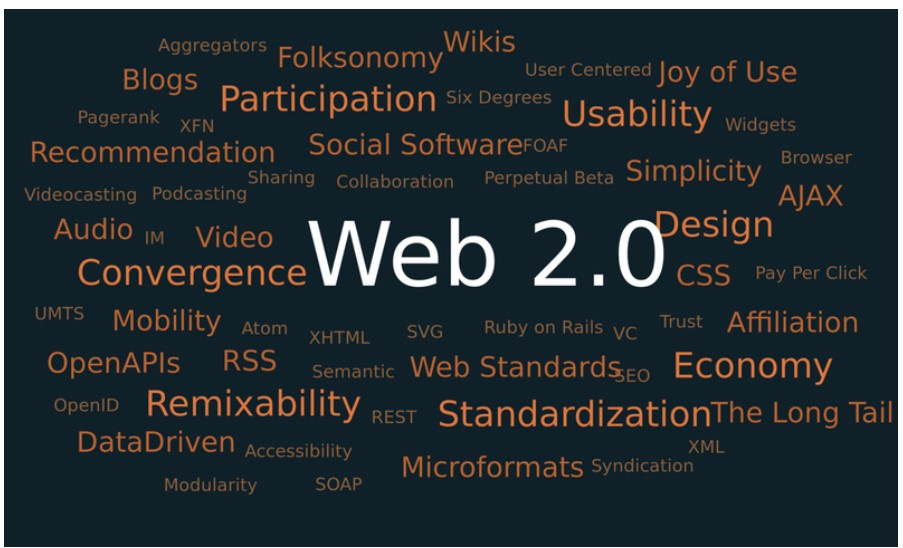

**Word cloud란?**

---
Word cloud란 데이터에서 얻어진 태그(혹은 단어)들을 분석하여 중요도나 인기도 등을 고려하여 시각적으로 표현하는 것이다. 보통은 2차원의 표와 같은 형태로 태그들이 배치되고 알파벳/가나다 순으로 나타난다. 시각적인 중요도 강조를 위해 각 태그들의 중요도(혹은 인기도)에 따라 글자의 색상이나 굵기 등 형태를 바꾸기도 한다.

종합하면, 중요한 단어나 키워드를 직관적으로 보여주는 시각화 도구다.

- [태그 클라우드(워드 클라우드)](https://ko.wikipedia.org/wiki/%ED%83%9C%EA%B7%B8_%ED%81%B4%EB%9D%BC%EC%9A%B0%EB%93%9C)

<br>


**전체 데이터를 Word cloud로 표현하기**

---
앞서 형태소 단위로 토큰화한 데이터를 토대로 Word cloud를 만들어 볼 예정이다. Word cloud를 만들기 위해서는 `wordcloud` 패키지와 이를 그려주는 `matplotlib` 패키지를 사용한다. Word cloud의 입력 데이터가 형태가 하나의 문자열로 이루어 진다는 점을 고려하면, 패키지 내에서 자동으로 공백을 기준으로 분절함을 유추할 수 있다.<br>
`matplotlib`의 옵션을 이용하면 그려질 Word cloud의 크기를 지정하고, 축을 지우거나 색상을 변경할 수 있다. 자세한 옵션은 아래 링크를 참고하면 된다.

- [Word cloud](https://github.com/amueller/word_cloud)
- [matplotlib](https://matplotlib.org/)

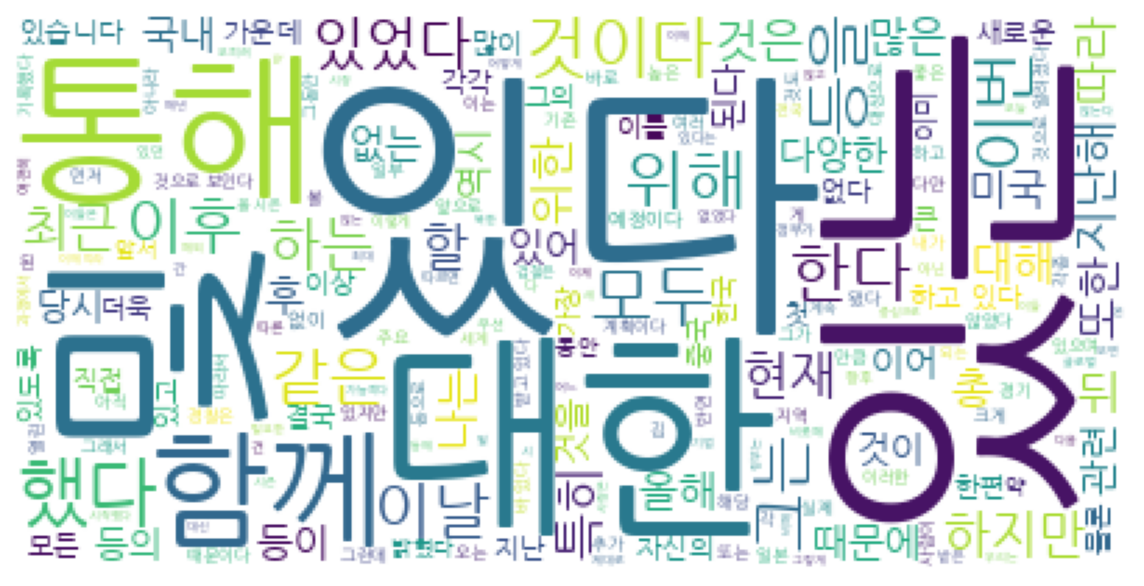

In [11]:
#한국어 불용어 사전을 정의
stopwords = set(korean_stopword)

# CREATE WORDCLOUD
wc = WordCloud(
    font_path='/usr/share/fonts/truetype/nanum/NanumGothic.ttf',
    background_color='white',
    stopwords=stopwords
    )
wc.generate(' '.join(news_lines))

# Plot wordcloud
plt.figure(figsize=(10,8)) #plot size
plt.imshow(wc) 
plt.axis('off') #axis delete
plt.show()

그려진 결과를 보니 가장 크기가 큰 단어는 `있는`, `있다`, `대한` 등이다. 하지만 이런 단어들은 중요한 의미를 가진다고 보기는 어렵다. 이를 해결하기 위해 앞에서 배웠던 명사만 추리는 코드를 사용해보자.

우선 형태소 분석된 결과에서 명사만 찾아 `noun_sent_list`를 만들어 보자.

In [12]:
komoran = Komoran()

news = open(PATH+"/KCC150_100k.txt",'r')
news_lines = news.read().splitlines()

noun_sent_list = []

for idx, line in enumerate(news_lines):
    morph_result = komoran.pos(line) #형태소 분석
  
    noun_sent = ''
  
    for word, tag in morph_result:
        if tag.startswith('NN'): #komoran은 NNP,NNG 가 명사
            noun_sent += word

    noun_sent_list.append(noun_sent)

print(len(noun_sent_list))
news.close()

100000


만들어진 `noun_sent_list` 시각화

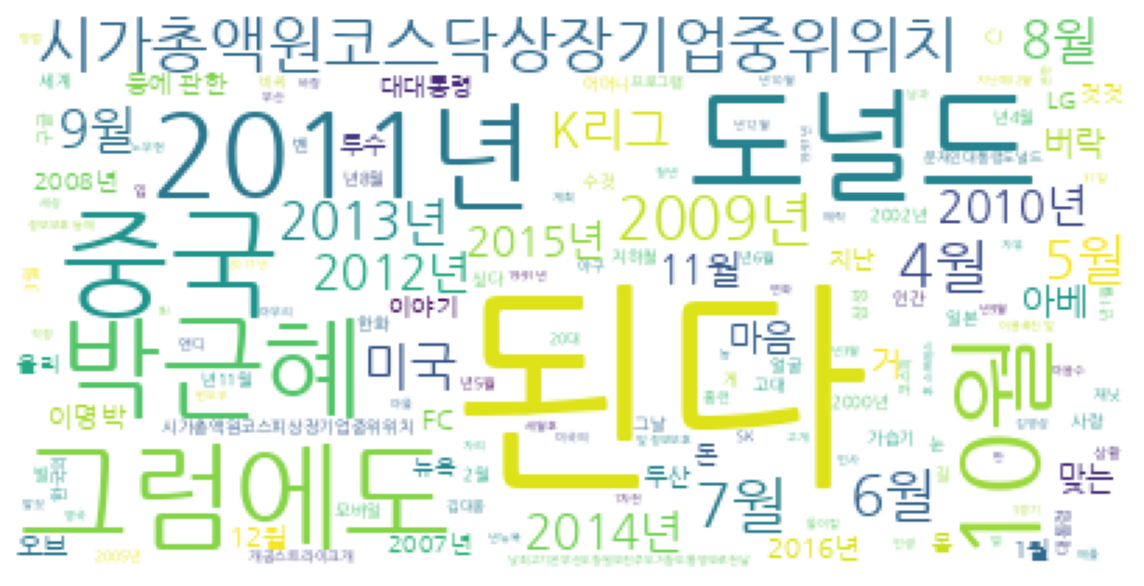

In [13]:
#한국어 불용어 사전을 정의
stopwords = set(korean_stopword)

# CREATE WORDCLOUD
wc = WordCloud(
    font_path='/usr/share/fonts/truetype/nanum/NanumGothic.ttf',
    background_color='white',
    stopwords=stopwords
    )
wc.generate(' '.join(noun_sent_list))

# Plot wordcloud
plt.figure(figsize=(10,8)) #plot size
plt.imshow(wc) 
plt.axis('off') #axis delete
plt.show()

**자동차 단어만 Word cloud로 표현하기**

---
뉴스 기사에서 자동차 단어를 추리는 방법으로 자동차 사전을 사용하였다. 앞서 사용한 방법을 토대로 뉴스 기사에서 자동차 관련 단어만 추려보고, 이를 Word cloud로 표현해 보도록 하자. 여기서도 앞에서 언급한 것처럼 한 개의 어절로 이루어진 자동차 단어만 다룬다.

우선 자동차 관련 단어만 골라 `car_sent_list`에 담는다.

In [14]:
komoran = Komoran()

news = open(PATH+"/KCC150_100k.txt",'r')
news_lines = news.read().splitlines()

car_file = open(PATH+"/carDic.txt", 'r')
car_words_list = car_file.read().split('\n')

car_sent_list = []

for line in news_lines:
    line = line.split() #문장 to 단어
    car_sent_list.append(' '.join([word for word in line if word in car_words_list]))

print(len(car_sent_list))
news.close()
car_file.close()

100000


시각화

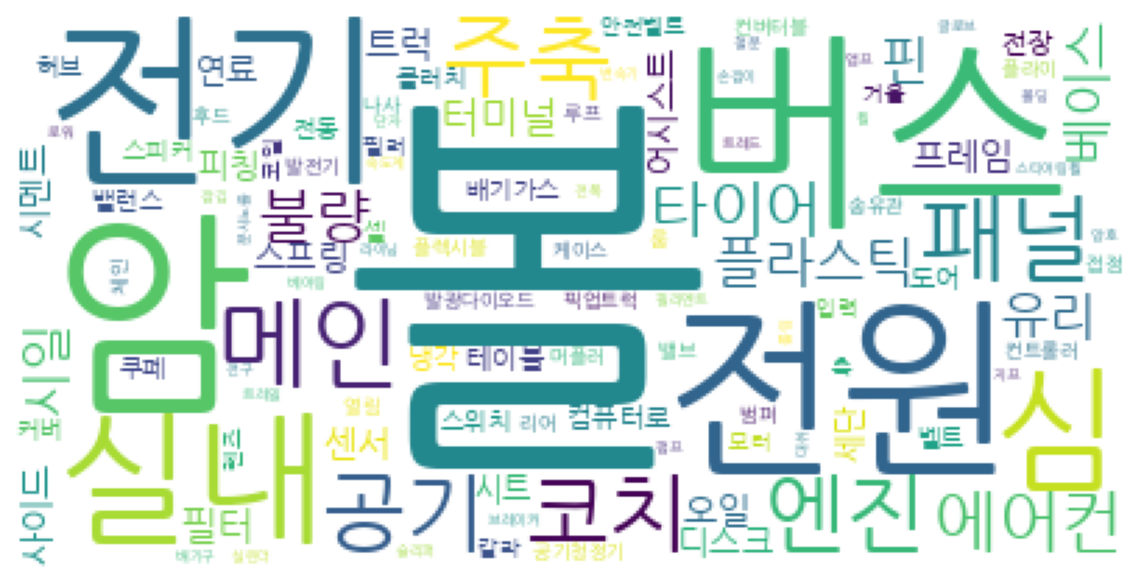

In [15]:
#한국어 불용어 사전을 정의
stopwords = set(korean_stopword)

# CREATE WORDCLOUD
wc = WordCloud(
    font_path='/usr/share/fonts/truetype/nanum/NanumGothic.ttf',
    background_color='white',
    stopwords=stopwords
    )
wc.generate(' '.join(car_sent_list))

# Plot wordcloud
plt.figure(figsize=(10,8)) #plot size
plt.imshow(wc) 
plt.axis('off') #axis delete
plt.show()

지금까지 말뭉치로부터 형태소 분석까지 이르는 과정을 해 봤다.

이 과정은 기초적이지만 매우 중요한 과정이다. 형태소 분석을 어떻게 하느냐, 토큰화를 어떤 방식으로 진행하느냐에 따라 모델의 결과에 엄청난 결과를 미친다.

앞으로 토큰화된 결과를 이용해서 쏘카가 원하는 카테고리 분류 작업을 진행할 예정이다. 그 전에 이 토큰화 방식이 어떻게 진행되는지, 토큰화 방식에 어떤 종류가 있는지 알아보는 것이 중요하다.